In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [9]:
eq_path = "../data/random_walk_eqs/00000.npy"
eq = np.load(eq_path)

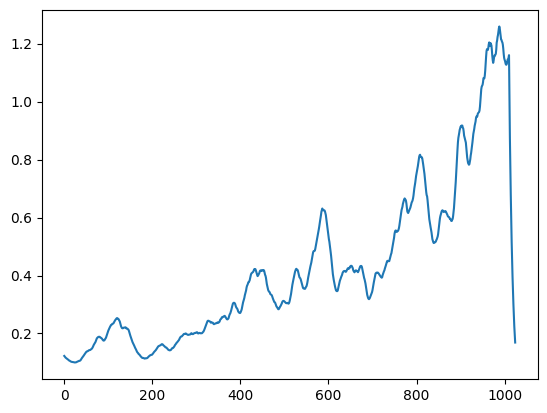

In [10]:
plt.plot(eq)
plt.show()

[0.12254602 0.12251141 0.12247679 ... 0.16963468 0.16920056 0.16876644]
New length: 62048


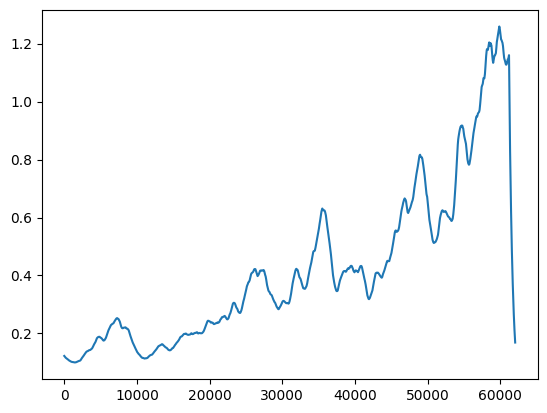

In [11]:
# Define the new length
new_length = 62048

# Create an array of indices for the original and new lengths
original_indices = np.arange(len(eq))
new_indices = np.linspace(0, len(eq) - 1, new_length)

# Interpolate the eq array
eq_interpolated = np.interp(new_indices, original_indices, eq)

print(eq_interpolated)
print(f"New length: {len(eq_interpolated)}")

plt.plot(eq_interpolated)
plt.show()

[0.12254602 0.12044986 0.11866967 ... 0.22478999 0.19508456 0.16876644]
Downsampled length: 1025


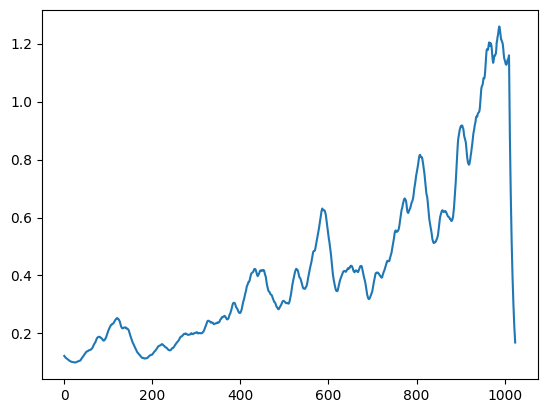

In [12]:
# Create an array of indices for the downsampled length
downsampled_indices = np.arange(len(eq))

# Interpolate the eq_interpolated array back to the original length
eq_downsampled = np.interp(downsampled_indices, new_indices, eq_interpolated)

print(eq_downsampled)
print(f"Downsampled length: {len(eq_downsampled)}")

plt.plot(eq_downsampled)
plt.show()

In [14]:
eq_tensor = torch.tensor(eq)
print(eq_tensor)

tensor([0.1225, 0.1204, 0.1187,  ..., 0.2248, 0.1951, 0.1688],
       dtype=torch.float64)


tensor([0.1225, 0.1225, 0.1225,  ..., 0.1688, 0.1688, 0.1688],
       dtype=torch.float64)
Interpolated tensor length: 62048


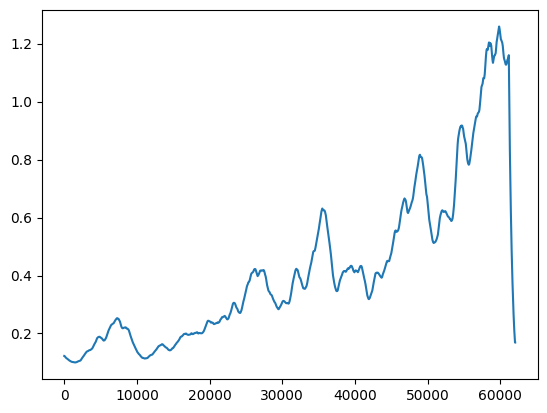

In [15]:
import torch.nn.functional as F

# Convert the eq tensor to a 2D tensor with shape (1, 1, original_length)
eq_tensor_2d = eq_tensor.unsqueeze(0).unsqueeze(0)

# Interpolate the tensor to the new length
eq_tensor_interpolated = F.interpolate(
    eq_tensor_2d, size=new_length, mode="linear", align_corners=False
)

# Squeeze the tensor back to 1D
eq_tensor_interpolated = eq_tensor_interpolated.squeeze()

print(eq_tensor_interpolated)
print(f"Interpolated tensor length: {eq_tensor_interpolated.shape[0]}")

plt.plot(eq_tensor_interpolated)
plt.show()

tensor([0.1225, 0.1204, 0.1187,  ..., 0.2248, 0.1951, 0.1688],
       dtype=torch.float64)
Downsampled tensor length: 1025


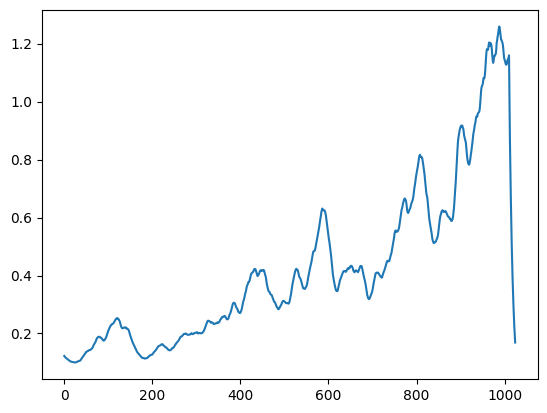

In [16]:
# Convert the eq tensor to a 2D tensor with shape (1, 1, new_length)
eq_tensor_interpolated_2d = eq_tensor_interpolated.unsqueeze(0).unsqueeze(0)

# Interpolate the tensor back to the original length
eq_tensor_downsampled = F.interpolate(
    eq_tensor_interpolated_2d, size=len(eq), mode="linear", align_corners=False
)

# Squeeze the tensor back to 1D
eq_tensor_downsampled = eq_tensor_downsampled.squeeze()

print(eq_tensor_downsampled)
print(f"Downsampled tensor length: {eq_tensor_downsampled.shape[0]}")

plt.plot(eq_tensor_downsampled)
plt.show()

In [18]:
(eq_tensor - eq_tensor_downsampled).sum()

tensor(4.1266e-05, dtype=torch.float64)